In [3]:
import os
from os import listdir

In [4]:
train_data=r'Clothes/Train'
test_data=r'Clothes/Test'

# Displaying The images......

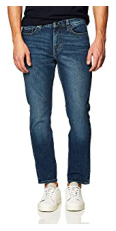

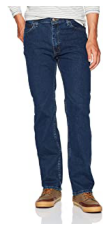

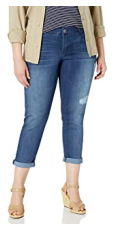

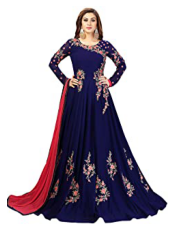

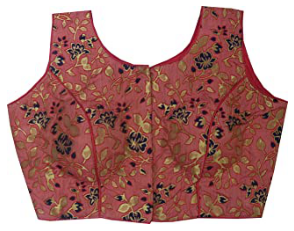

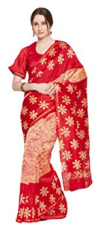

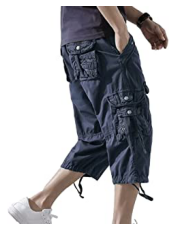

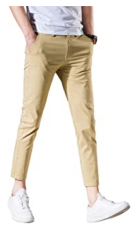

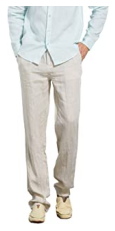

In [5]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_jeans=r'Clothes/Train/Jeans_Images'
train_saree=r'Clothes/Train/Sarees_Images'
train_trouser=r'Clothes/Train/Trousers_Images'


Cloth_train=[train_jeans, train_saree, train_trouser]
for dirs in Cloth_train:
    k=listdir(dirs)
    for i in k[:3]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [6]:
file1 = os.listdir(r'Clothes/Train')
file1

['Jeans_Images', 'Sarees_Images', 'Trousers_Images']

In [7]:
file2 = os.listdir(r'Clothes/Test')
file2

['Jeans_Images', 'Sarees_Images', 'Trousers_Images']

Checking the Count of images in each folder

In [8]:
print("Count of Training Images")
print("No.of Images of Sarees in train dataset -> ",len(os.listdir(r'Clothes/Train/Sarees_Images')))
print("No.of Images of Jeans in train dataset -> ",len(os.listdir(r'Clothes/Train/Jeans_Images')))
print("No.of Images of Trousers in train dataset ->",len(os.listdir(r'Clothes/Train/Trousers_Images')))
"\n"

print("Count of Test Images")
print("No.of Images of Sarees in test dataset-> ",len(os.listdir(r'Clothes/Test/Sarees_Images')))
print("No.of Images of Jeans in test dataset ->",len(os.listdir(r'Clothes/Test/Jeans_Images')))
print("No.of Images of Trousers in test dataset-> ",len(os.listdir(r'Clothes/Test/Trousers_Images')))

Count of Training Images
No.of Images of Sarees in train dataset ->  300
No.of Images of Jeans in train dataset ->  300
No.of Images of Trousers in train dataset -> 300
Count of Test Images
No.of Images of Sarees in test dataset->  43
No.of Images of Jeans in test dataset -> 43
No.of Images of Trousers in test dataset->  43


# Model Building....

In [9]:
#importing all the required libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Defining dimensions of images and other parameters....

In [10]:
input_shape=(128,128,3)
img_width=128
img_height=128
batch_size=12
epoch=100
train_samples=300
test_samples=43

In [11]:
# Data Augmentation on Training Images

Train_datagen=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Test Data Generator
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 129 images belonging to 3 classes.


In [12]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

In [13]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [14]:
# Fitting the Training Data
history = model.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/100
25/25 [==============================] - 68s 2s/step - loss: 1.0941 - accuracy: 0.4633 - val_loss: 1.0513 - val_accuracy: 0.4167

Epoch 00001: val_accuracy improved from -inf to 0.41667, saving model to best.h5
Epoch 2/100
25/25 [==============================] - 67s 3s/step - loss: 1.0271 - accuracy: 0.5000 - val_loss: 1.0140 - val_accuracy: 0.5833

Epoch 00002: val_accuracy improved from 0.41667 to 0.58333, saving model to best.h5
Epoch 3/100
25/25 [==============================] - 60s 2s/step - loss: 0.8174 - accuracy: 0.6067 - val_loss: 0.7836 - val_accuracy: 0.5556

Epoch 00003: val_accuracy did not improve from 0.58333
Epoch 4/100
25/25 [==============================] - 61s 2s/step - loss: 0.7354 - accuracy: 0.5867 - val_loss: 0.7442 - val_accuracy: 0.5556

Epoch 00004: val_accuracy did not improve from 0.58333
Epoch 5/100
25/25 [==============================] - 59s 2s/step - loss: 0.5916 - accuracy: 0.7167 - val_loss: 0.7322 - val_accuracy: 0.7222

Epoch 00005: va

In [15]:
#Saving the best model
model.save('best_model.h5')

In [16]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0   1.094139  0.463333  1.051300      0.416667
1   1.027087  0.500000  1.013983      0.583333
2   0.817383  0.606667  0.783595      0.555556
3   0.735359  0.586667  0.744196      0.555556
4   0.591579  0.716667  0.732184      0.722222
..       ...       ...       ...           ...
74  0.323508  0.880000  1.154527      0.611111
75  0.443401  0.833333  0.352910      0.861111
76  0.363682  0.830000  0.283024      0.944444
77  0.367861  0.856667  0.309986      0.888889
78  0.392140  0.846667  0.243337      0.944444

[79 rows x 4 columns]

# Prediction 

In [17]:
#Loading the saved model
saved_model = load_model('best_model.h5')

In [18]:
#creating instances where elements from test directory will be called
test_jeans=r'Clothes/Test/Jeans_Images'
test_saree=r'Clothes/Test/Sarees_Images'
test_trouser=r'Clothes/Test/Trousers_Images'

# Displaying Predicted images....

Input Image is: img301.jpeg


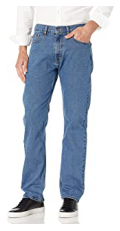

Predicted Label is: [2] 

Input Image is: img302.jpeg


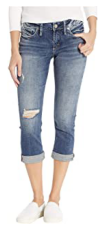

Predicted Label is: [0] 

Input Image is: img303.jpeg


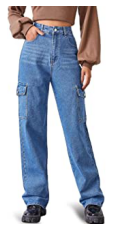

Predicted Label is: [2] 

Input Image is: img304.jpeg


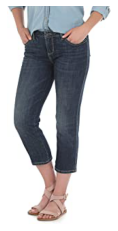

Predicted Label is: [0] 

Input Image is: img305.jpeg


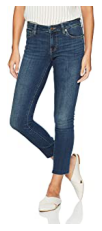

Predicted Label is: [0] 

Input Image is: img306.jpeg


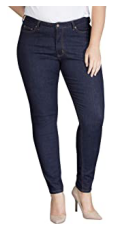

Predicted Label is: [2] 

Input Image is: img307.jpeg


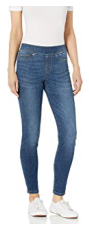

Predicted Label is: [2] 

Input Image is: img308.jpeg


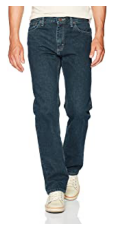

Predicted Label is: [2] 

Input Image is: img309.jpeg


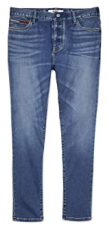

Predicted Label is: [0] 

Input Image is: img310.jpeg


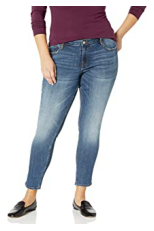

Predicted Label is: [2] 

Input Image is: img311.jpeg


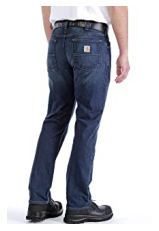

Predicted Label is: [2] 

Input Image is: img312.jpeg


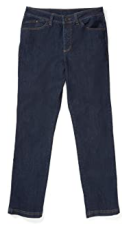

Predicted Label is: [2] 

Input Image is: img313.jpeg


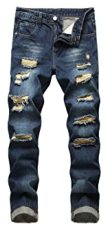

Predicted Label is: [0] 

Input Image is: img314.jpeg


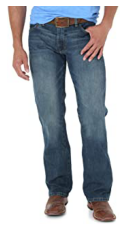

Predicted Label is: [2] 

Input Image is: img315.jpeg


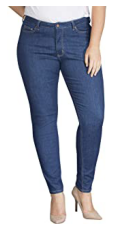

Predicted Label is: [2] 

Input Image is: img316.jpeg


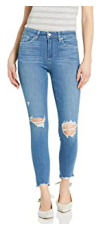

Predicted Label is: [2] 

Input Image is: img317.jpeg


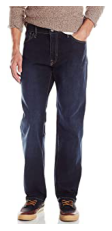

Predicted Label is: [2] 

Input Image is: img318.jpeg


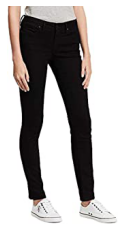

Predicted Label is: [0] 

Input Image is: img319.jpeg


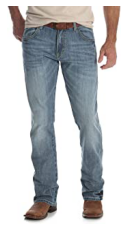

Predicted Label is: [0] 

Input Image is: img320.jpeg


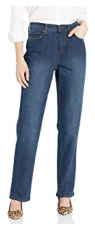

Predicted Label is: [2] 

Input Image is: img321.jpeg


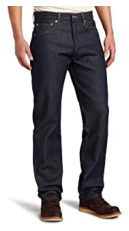

Predicted Label is: [0] 

Input Image is: img322.jpeg


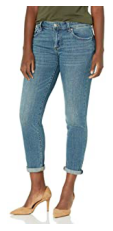

Predicted Label is: [0] 

Input Image is: img323.jpeg


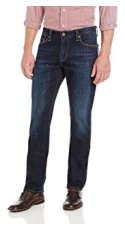

Predicted Label is: [0] 

Input Image is: img324.jpeg


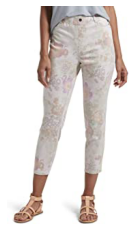

Predicted Label is: [0] 

Input Image is: img325.jpeg


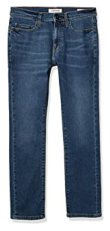

Predicted Label is: [0] 

Input Image is: img326.jpeg


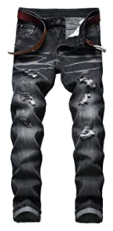

Predicted Label is: [0] 

Input Image is: img327.jpeg


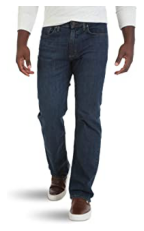

Predicted Label is: [2] 

Input Image is: img328.jpeg


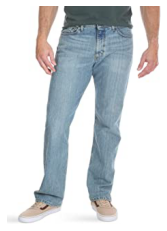

Predicted Label is: [0] 

Input Image is: img329.jpeg


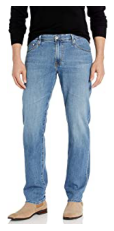

Predicted Label is: [0] 

Input Image is: img330.jpeg


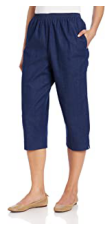

Predicted Label is: [2] 

Input Image is: img331.jpeg


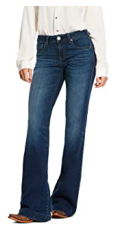

Predicted Label is: [2] 

Input Image is: img332.jpeg


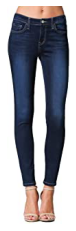

Predicted Label is: [0] 

Input Image is: img333.jpeg


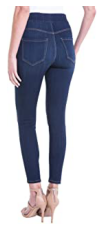

Predicted Label is: [2] 

Input Image is: img334.jpeg


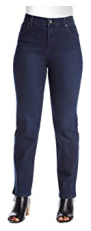

Predicted Label is: [2] 

Input Image is: img335.jpeg


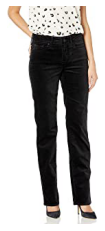

Predicted Label is: [2] 

Input Image is: img336.jpeg


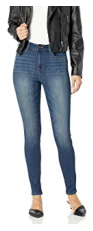

Predicted Label is: [2] 

Input Image is: img337.jpeg


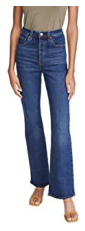

Predicted Label is: [0] 

Input Image is: img338.jpeg


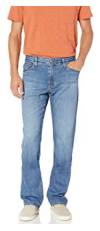

Predicted Label is: [0] 

Input Image is: img339.jpeg


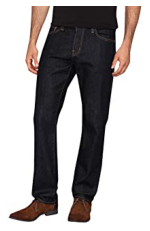

Predicted Label is: [0] 

Input Image is: img340.jpeg


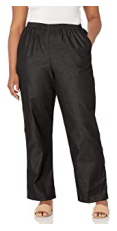

Predicted Label is: [2] 

Input Image is: img341.jpeg


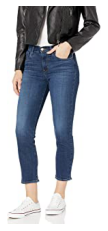

Predicted Label is: [0] 

Input Image is: img342.jpeg


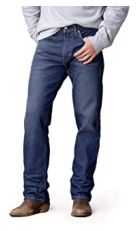

Predicted Label is: [0] 

Input Image is: img343.jpeg


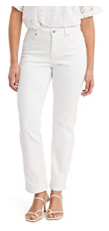

Predicted Label is: [0] 

Input Image is: img301.jpeg


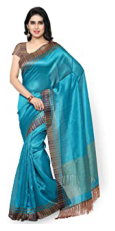

Predicted Label is: [1] 

Input Image is: img302.jpeg


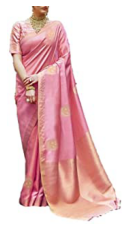

Predicted Label is: [1] 

Input Image is: img303.jpeg


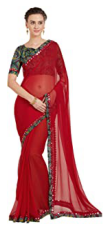

Predicted Label is: [1] 

Input Image is: img304.jpeg


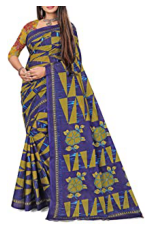

Predicted Label is: [1] 

Input Image is: img305.jpeg


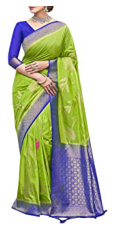

Predicted Label is: [1] 

Input Image is: img306.jpeg


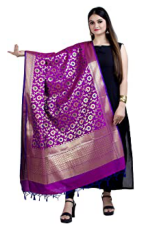

Predicted Label is: [1] 

Input Image is: img307.jpeg


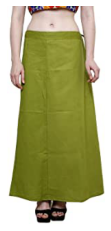

Predicted Label is: [1] 

Input Image is: img308.jpeg


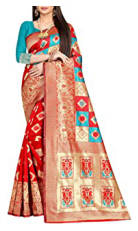

Predicted Label is: [1] 

Input Image is: img309.jpeg


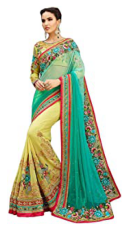

Predicted Label is: [1] 

Input Image is: img310.jpeg


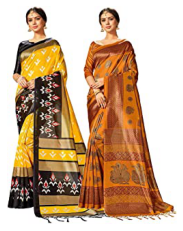

Predicted Label is: [1] 

Input Image is: img311.jpeg


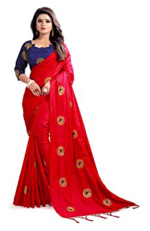

Predicted Label is: [1] 

Input Image is: img312.jpeg


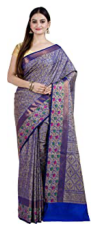

Predicted Label is: [1] 

Input Image is: img313.jpeg


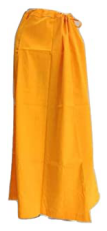

Predicted Label is: [1] 

Input Image is: img314.jpeg


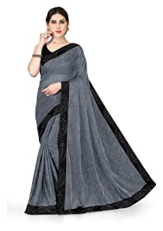

Predicted Label is: [1] 

Input Image is: img315.jpeg


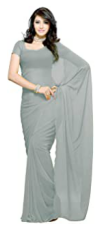

Predicted Label is: [1] 

Input Image is: img316.jpeg


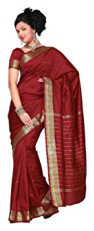

Predicted Label is: [1] 

Input Image is: img317.jpeg


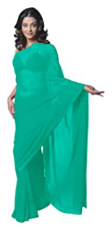

Predicted Label is: [1] 

Input Image is: img318.jpeg


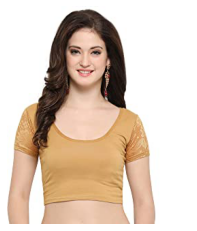

Predicted Label is: [1] 

Input Image is: img319.jpeg


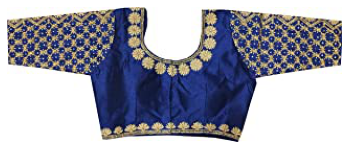

Predicted Label is: [1] 

Input Image is: img320.jpeg


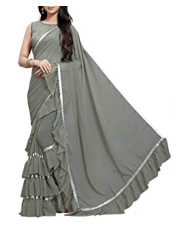

Predicted Label is: [1] 

Input Image is: img321.jpeg


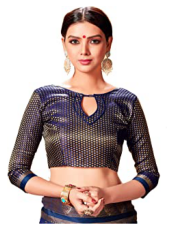

Predicted Label is: [1] 

Input Image is: img322.jpeg


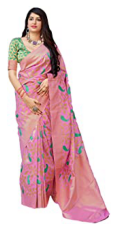

Predicted Label is: [1] 

Input Image is: img323.jpeg


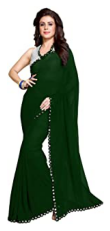

Predicted Label is: [1] 

Input Image is: img324.jpeg


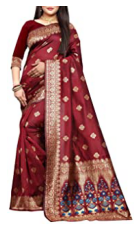

Predicted Label is: [1] 

Input Image is: img325.jpeg


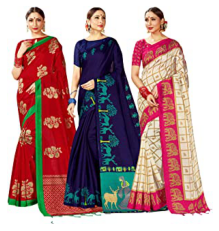

Predicted Label is: [1] 

Input Image is: img326.jpeg


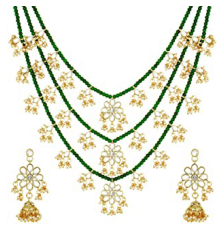

Predicted Label is: [0] 

Input Image is: img327.jpeg


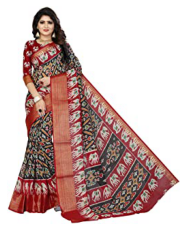

Predicted Label is: [1] 

Input Image is: img328.jpeg


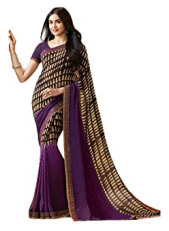

Predicted Label is: [1] 

Input Image is: img329.jpeg


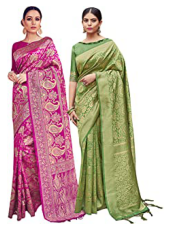

Predicted Label is: [1] 

Input Image is: img330.jpeg


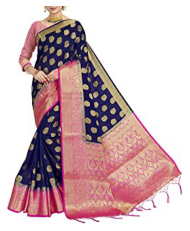

Predicted Label is: [1] 

Input Image is: img331.jpeg


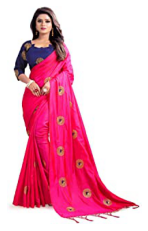

Predicted Label is: [1] 

Input Image is: img332.jpeg


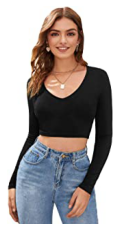

Predicted Label is: [1] 

Input Image is: img333.jpeg


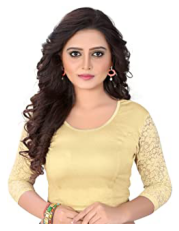

Predicted Label is: [1] 

Input Image is: img334.jpeg


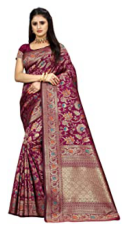

Predicted Label is: [1] 

Input Image is: img335.jpeg


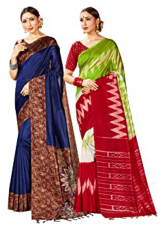

Predicted Label is: [1] 

Input Image is: img336.jpeg


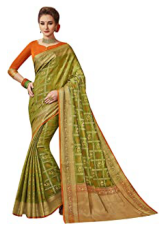

Predicted Label is: [1] 

Input Image is: img337.jpeg


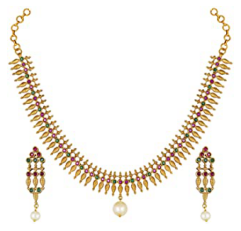

Predicted Label is: [0] 

Input Image is: img338.jpeg


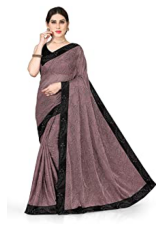

Predicted Label is: [1] 

Input Image is: img339.jpeg


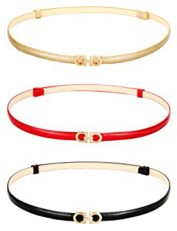

Predicted Label is: [0] 

Input Image is: img340.jpeg


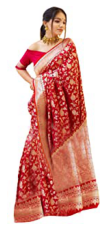

Predicted Label is: [1] 

Input Image is: img341.jpeg


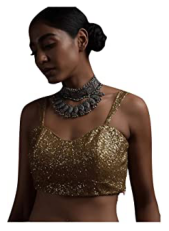

Predicted Label is: [1] 

Input Image is: img342.jpeg


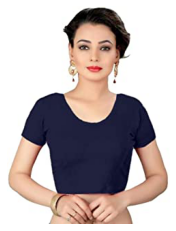

Predicted Label is: [1] 

Input Image is: img343.jpeg


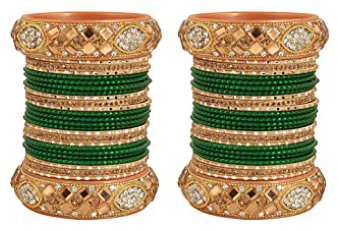

Predicted Label is: [0] 

Input Image is: img301.jpeg


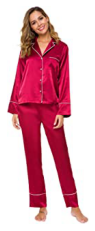

Predicted Label is: [2] 

Input Image is: img302.jpeg


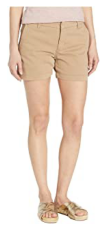

Predicted Label is: [0] 

Input Image is: img303.jpeg


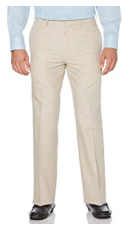

Predicted Label is: [0] 

Input Image is: img304.jpeg


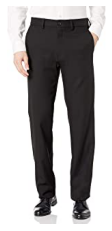

Predicted Label is: [2] 

Input Image is: img305.jpeg


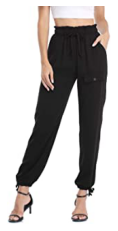

Predicted Label is: [2] 

Input Image is: img306.jpeg


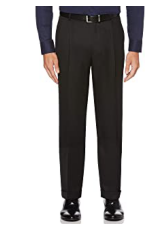

Predicted Label is: [2] 

Input Image is: img307.jpeg


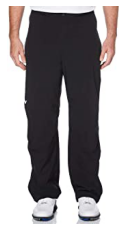

Predicted Label is: [2] 

Input Image is: img308.jpeg


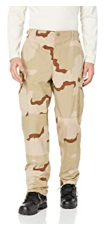

Predicted Label is: [2] 

Input Image is: img309.jpeg


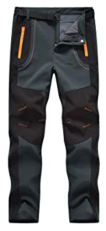

Predicted Label is: [0] 

Input Image is: img310.jpeg


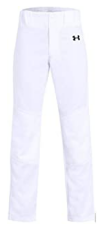

Predicted Label is: [0] 

Input Image is: img311.jpeg


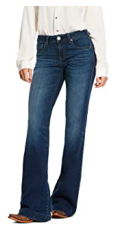

Predicted Label is: [2] 

Input Image is: img312.jpeg


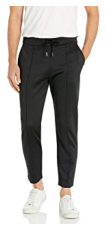

Predicted Label is: [2] 

Input Image is: img313.jpeg


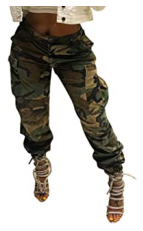

Predicted Label is: [2] 

Input Image is: img314.jpeg


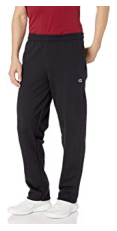

Predicted Label is: [2] 

Input Image is: img315.jpeg


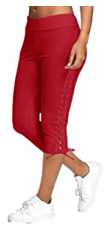

Predicted Label is: [2] 

Input Image is: img316.jpeg


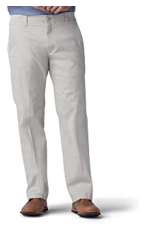

Predicted Label is: [0] 

Input Image is: img317.jpeg


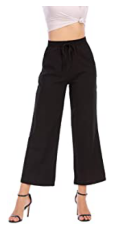

Predicted Label is: [2] 

Input Image is: img318.jpeg


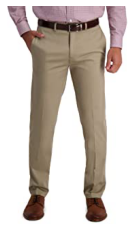

Predicted Label is: [2] 

Input Image is: img319.jpeg


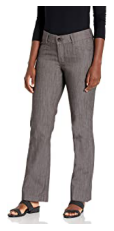

Predicted Label is: [2] 

Input Image is: img320.jpeg


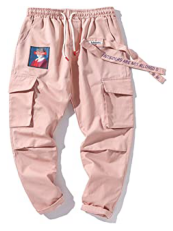

Predicted Label is: [0] 

Input Image is: img321.jpeg


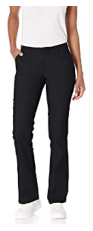

Predicted Label is: [2] 

Input Image is: img322.jpeg


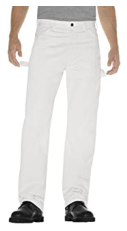

Predicted Label is: [0] 

Input Image is: img323.jpeg


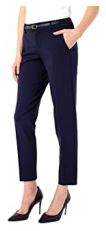

Predicted Label is: [0] 

Input Image is: img324.jpeg


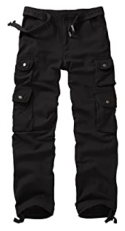

Predicted Label is: [2] 

Input Image is: img325.jpeg


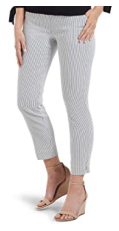

Predicted Label is: [0] 

Input Image is: img326.jpeg


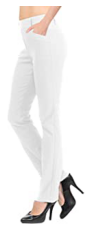

Predicted Label is: [0] 

Input Image is: img327.jpeg


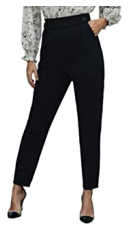

Predicted Label is: [2] 

Input Image is: img328.jpeg


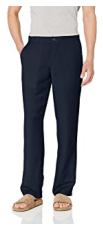

Predicted Label is: [2] 

Input Image is: img329.jpeg


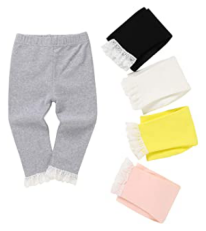

Predicted Label is: [1] 

Input Image is: img330.jpeg


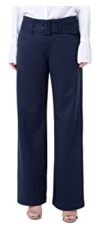

Predicted Label is: [2] 

Input Image is: img331.jpeg


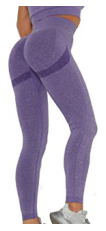

Predicted Label is: [2] 

Input Image is: img332.jpeg


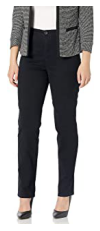

Predicted Label is: [2] 

Input Image is: img333.jpeg


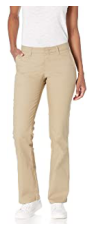

Predicted Label is: [0] 

Input Image is: img334.jpeg


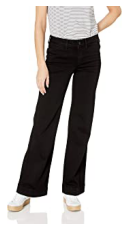

Predicted Label is: [2] 

Input Image is: img335.jpeg


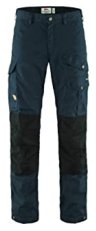

Predicted Label is: [0] 

Input Image is: img336.jpeg


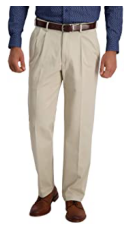

Predicted Label is: [0] 

Input Image is: img337.jpeg


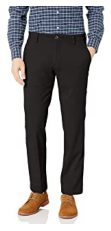

Predicted Label is: [2] 

Input Image is: img338.jpeg


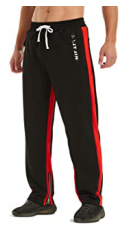

Predicted Label is: [2] 

Input Image is: img339.jpeg


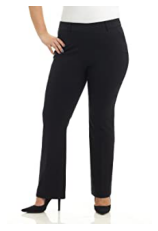

Predicted Label is: [2] 

Input Image is: img340.jpeg


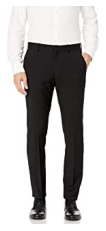

Predicted Label is: [2] 

Input Image is: img341.jpeg


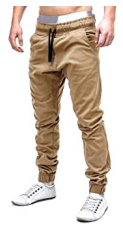

Predicted Label is: [2] 

Input Image is: img342.jpeg


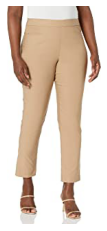

Predicted Label is: [0] 

Input Image is: img343.jpeg


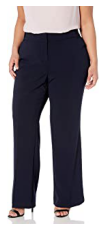

Predicted Label is: [2] 



In [19]:
test_dire=[test_jeans,test_saree,test_trouser]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")